# MathAData - Repérage dans le plan et distances


# Classification des images de 2 et de 7


!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.  
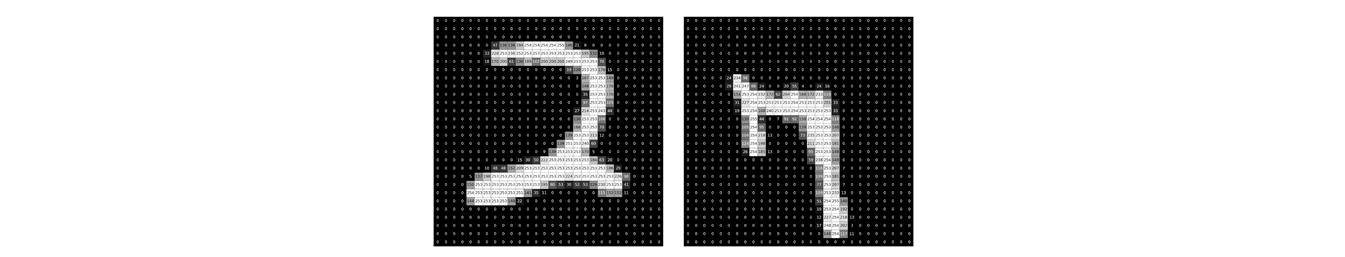  
!!!


!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">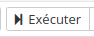</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!
!!! warning  SOS <details><summary>  
   Rien ne se passe ? Ou tu veux récupérer tes réponses ? Clique ici  </summary>   
Clique sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">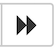</span>sur la barre d'outils en haut du notebook.  
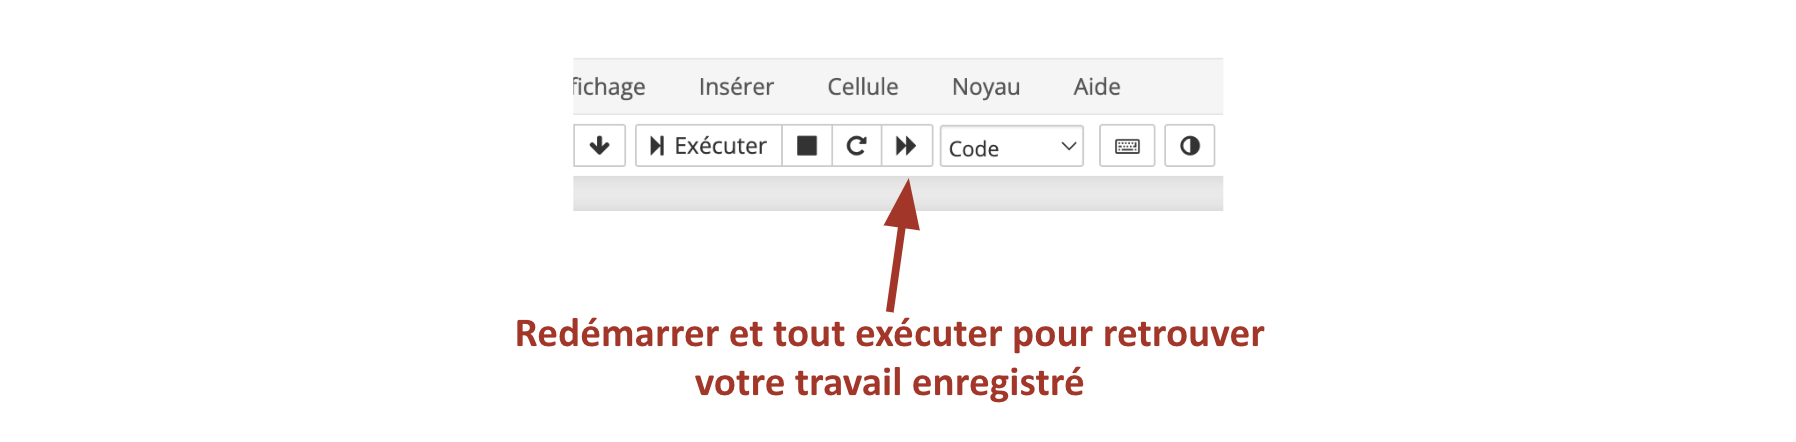  
Clique ensuite sur le bouton rouge ***Relancer et exécuter toutes les cellules***.</details>  
!!!


In [ ]:
from utilitaires_mnist import *
from utilitaires_S_GEO_milieu_distance import *

!!! tip Base de données  
Nous avons environ 6 000 images.  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher l'image correspondante et vous déplacer avec les flèches haut et bas du clavier.  
!!!


In [ ]:
affichage_banque()

validation_execution()

!!! question 1) Combien d'images de 7 y a-t-il parmi les 10 premières images ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre()

!!! question 2) Combien d'images contient la base de données au total ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_total_images = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre_total()

## A. Point de départ


!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
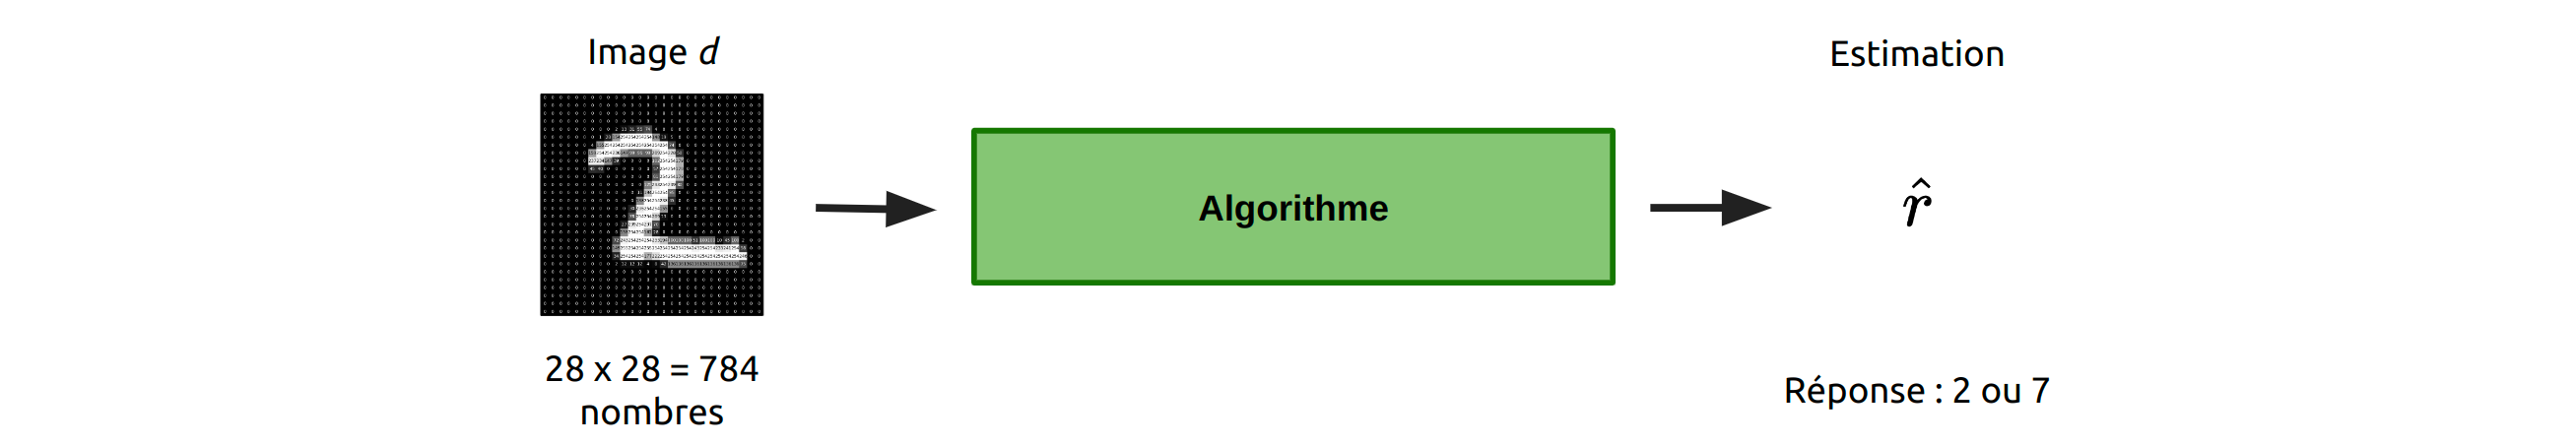  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours 2**.  
!!!


In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! question 3) Que répond l'algorithme fainéant pour ces trois images ?
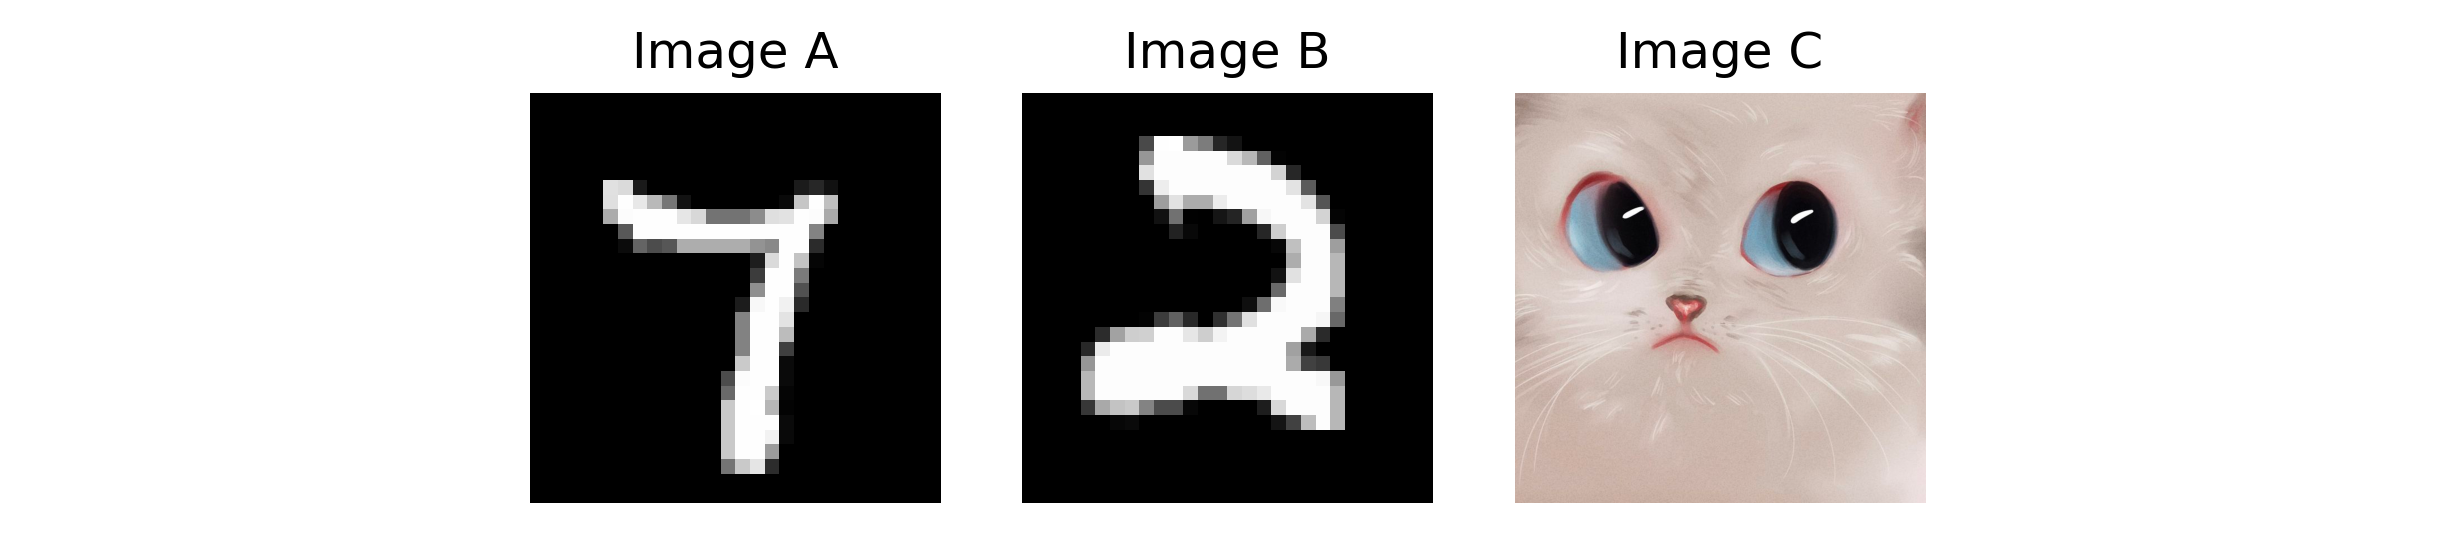  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!


In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Voici la formule donnant la proportion d'erreur :  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}}$$  
Plus le pourcentage d'erreur de votre algorithme est bas meilleure est votre solution.  
Une image mal classée est une image pour laquelle l'algorithme a donné une estimation différente de la vraie classe de l'image:  
$$\hat r \neq r.$$  
Remarque :   
Une proportion peut s'écrire en pourcentage en multipliant par $100\%$.  
Par exemple si l'algorithme fait 4 erreurs sur 20 images : $$\text{erreur} = \frac{4}{20}=0,2=0,2\times100\% = 20\%.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question 4) Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 000 images.  
!!!


In [ ]:
calculer_score_etape_1()

## B. Image numérique


!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
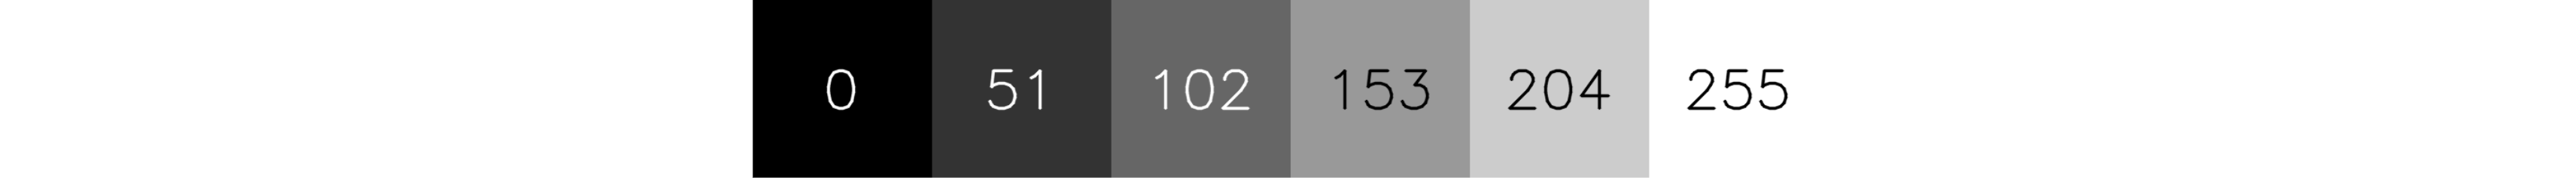  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!


In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question 5) Quelle est la valeur du pixel positionné en ligne 18 et colonne 15 ?
Lisez dans le tableau la valeur du pixel et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
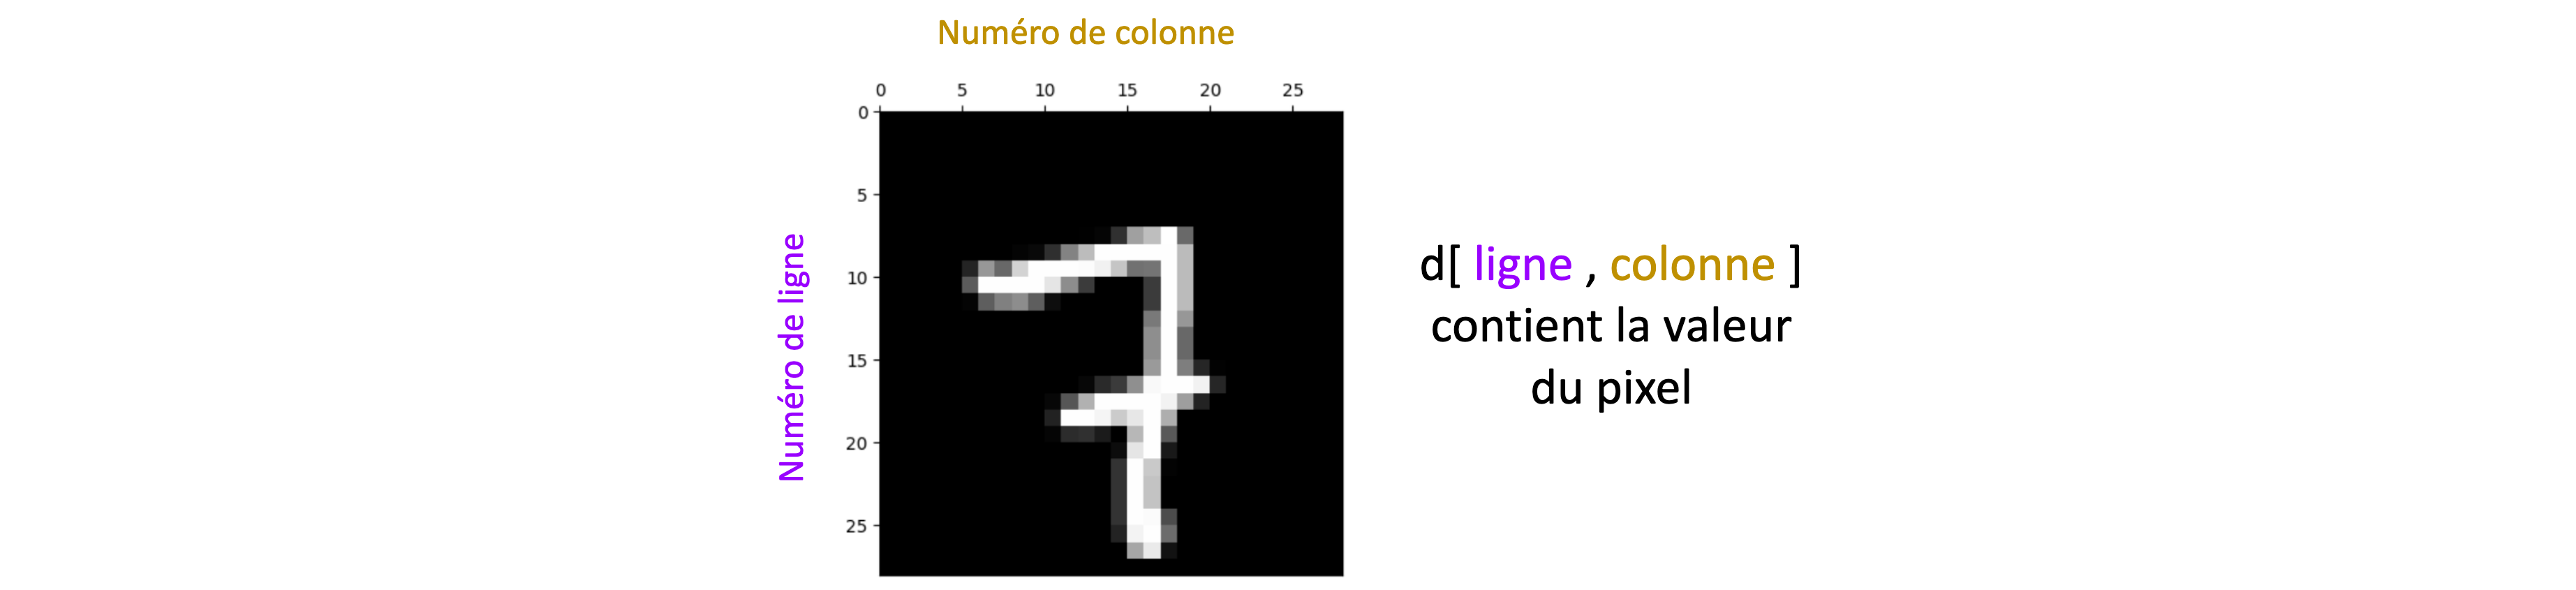  
Remarque : Dans le cas des tableaux python la première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne).  
!!!


In [ ]:
pixel = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_pixel()

!!! question 6) Transformez le pixel (17,15) en pixel noir
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!


In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## C. Caractéristiques


### Calcul des caractéristiques


!!! abstract Caractéristique d'une image  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
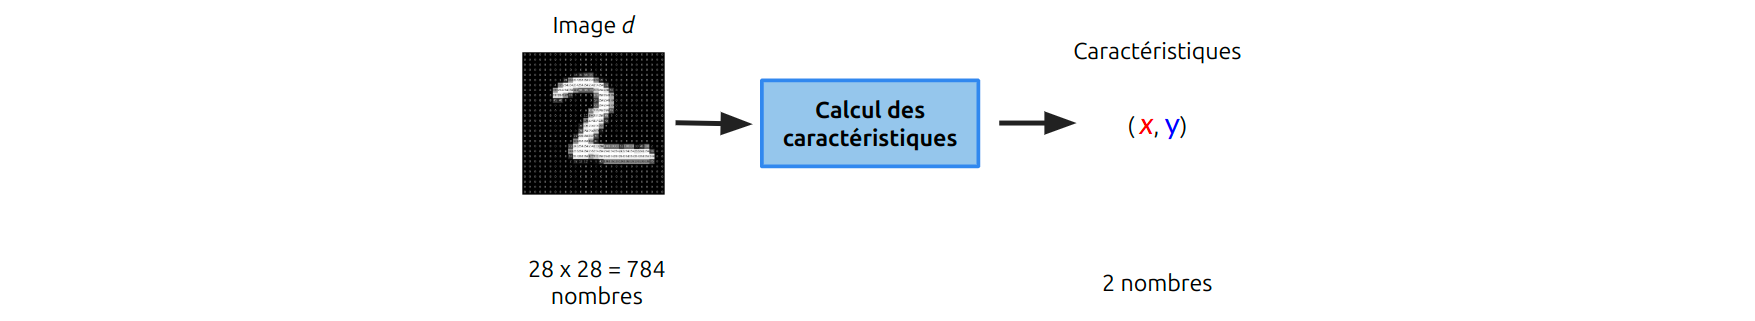  
Les caractéristiques notées $x, y, ...$ permettent de simplifier l'image en gardant peu de nombres.  
!!!


!!! tip La moyenne  
Pour résumer les valeurs de certains pixels en une seule valeur, on fait la moyenne de ces pixels.  
!!!


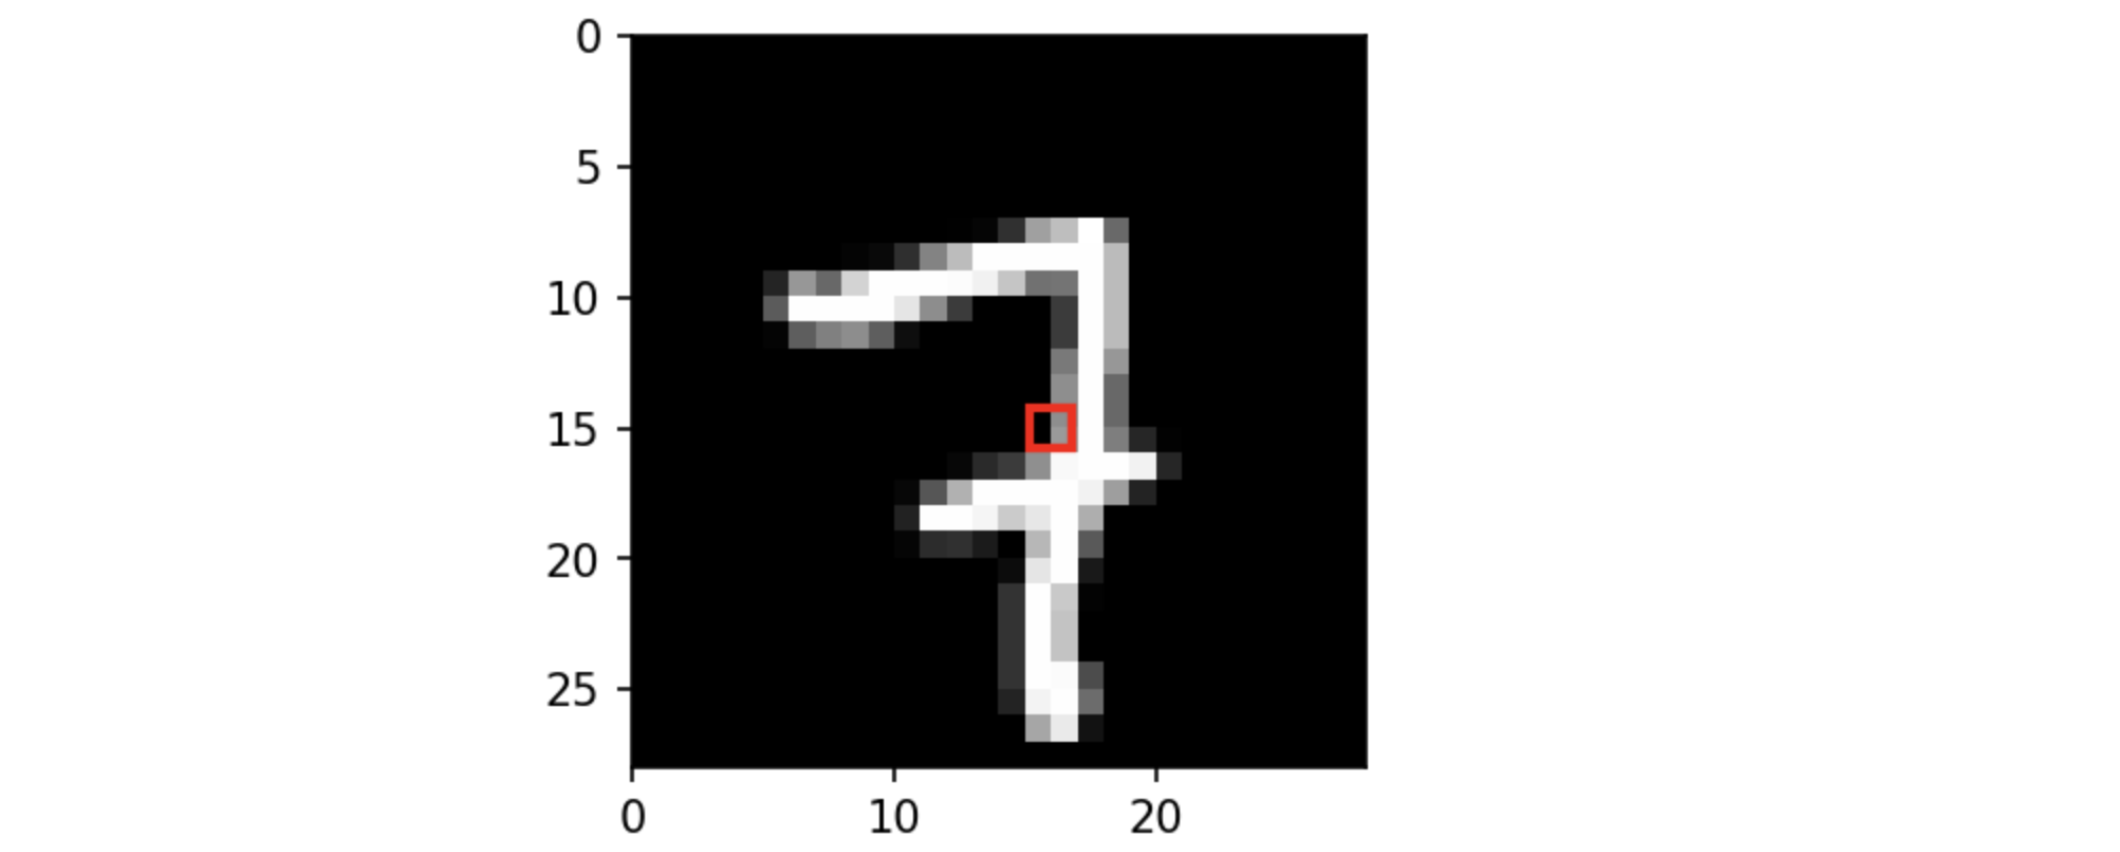  
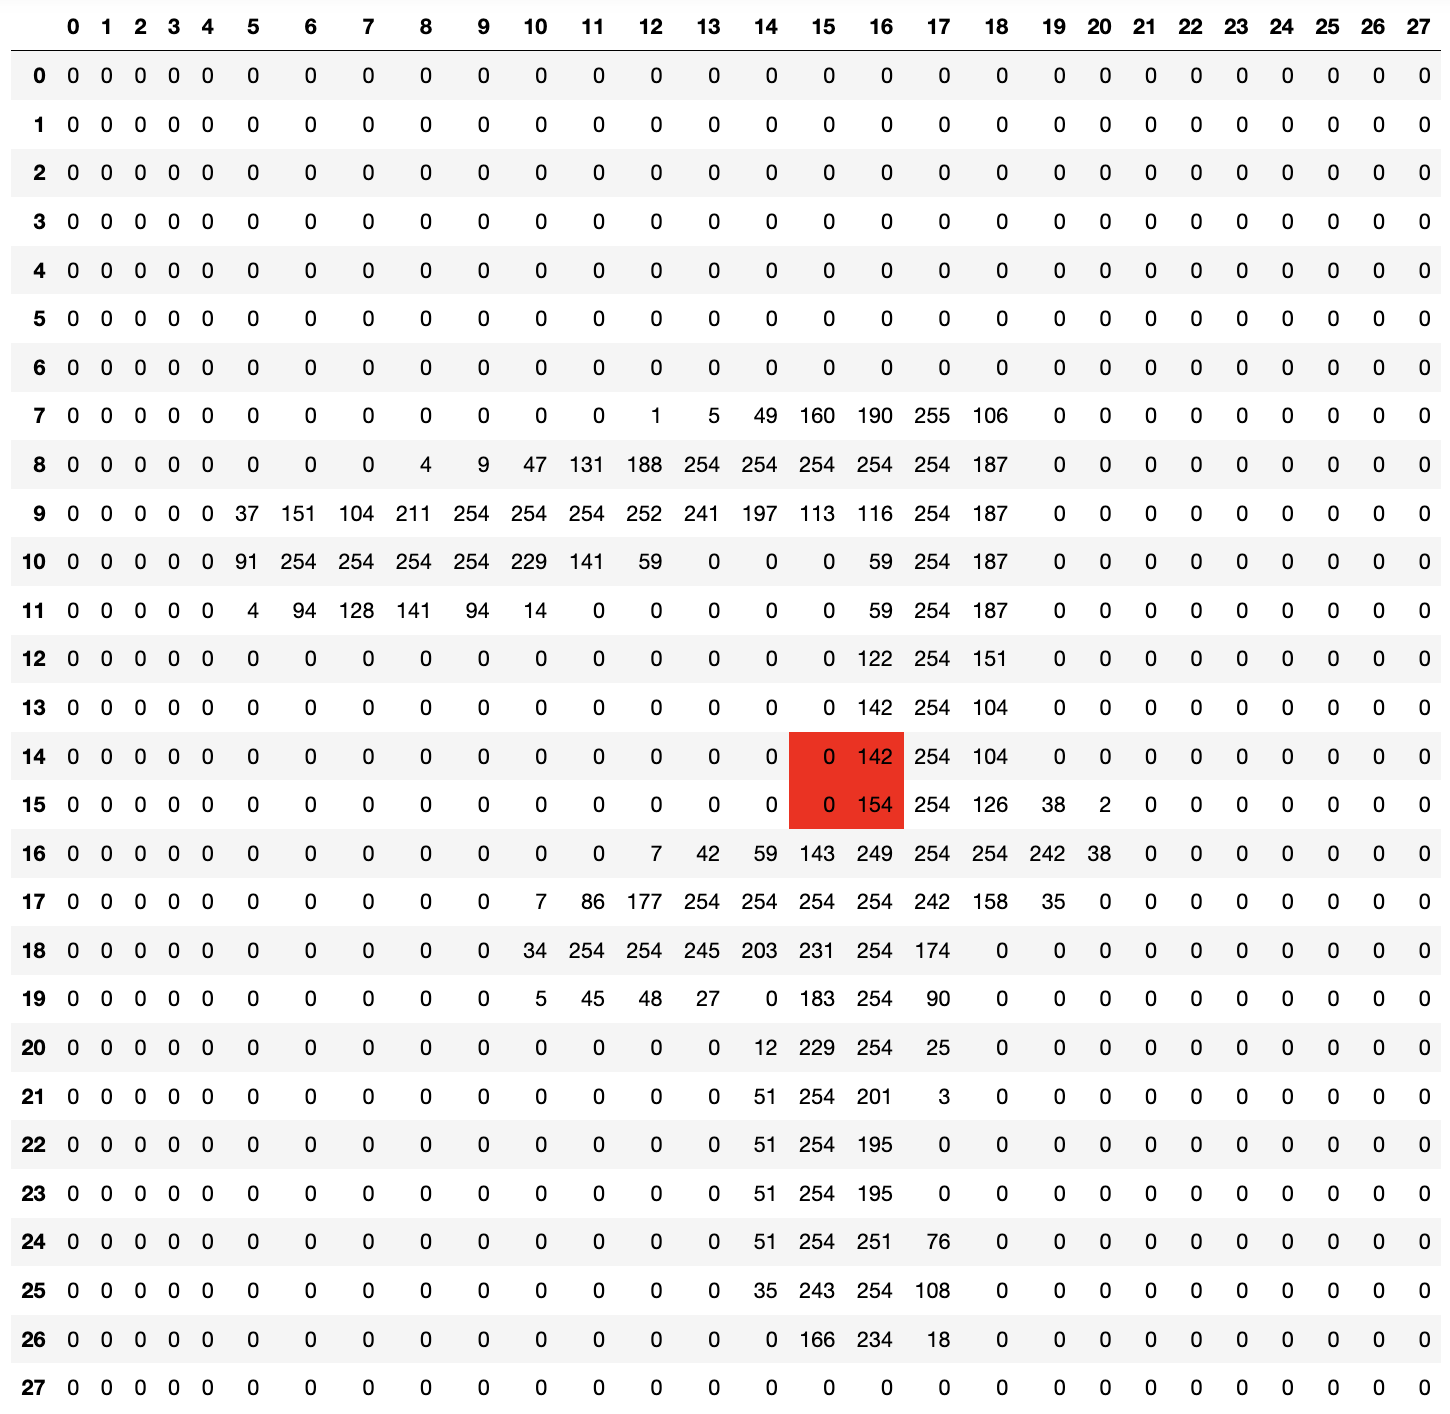
!!! question 7) Calculez la moyenne sur les pixels rouges
Calculez la moyenne des pixels de la zone surlignée en rouge. Donnez votre réponse **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
!!!


In [ ]:
moyenne_zone_4pixels = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_moyenne()

!!! tip Moyenne sur 2 zones différentes  
Nous allons commencer avec deux caractéristiques de référence : la moyenne sur la moitié haute de l'image et la moyenne sur la moitié basse.  
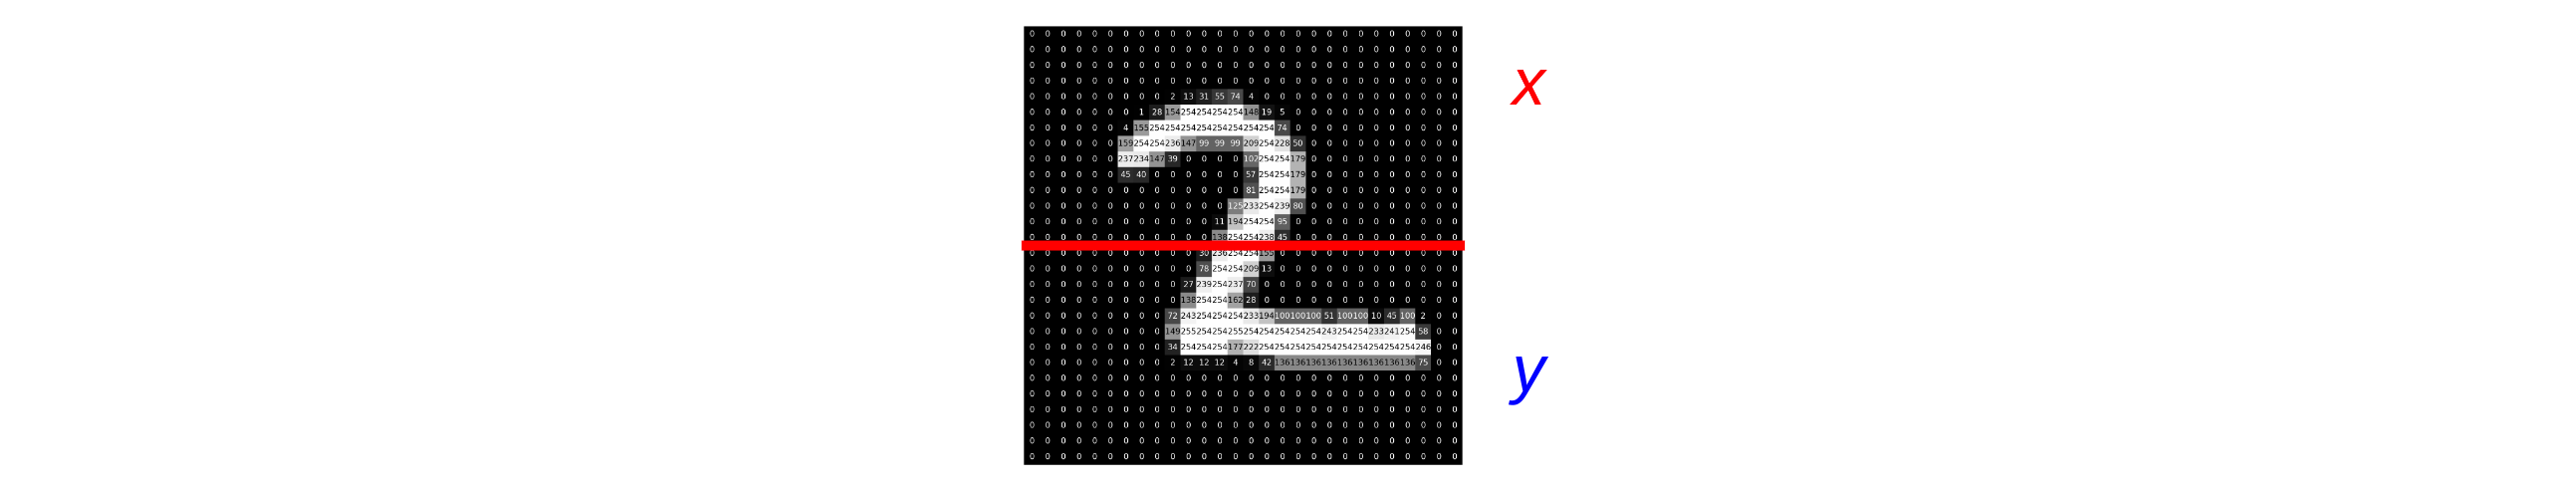  
**Exécutez la cellule suivante** pour voir un exemple.  
!!!


In [ ]:
affichage_2_geo()

validation_execution_2_caracteristiques()

!!! question 8) Quelle image correspond à chaque couple ($x,y$) ?
On a calculé pour les deux images ci-dessus leurs caractéristiques $(x,y)$. Regardez les deux images et le tableau pour déduire quelle image correspond à chaque couple de moyennes $(x,y)$.  
**Remplacez les `...`** dans la cellule suivante avec 2 et 7 dans le bon ordre **puis exécutez**.  
!!!


In [ ]:
r1 = ...
r2 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_2_caracteristiques()

### Visualisation dans le plan


!!! info Visualisation dans le plan  
Nous avons maintenant 2 valeurs $(x, y)$ associées à chaque image. Nous pouvons placer les images dans un plan en utilisant x et y comme coordonnées.  
**Exécutez la cellule suivante** pour afficher les points correspondant à 2 images.  
!!!


In [ ]:
tracer_2_points()
validation_execution_2_points()

!!! question 9) Donnez les coordonnées $(x, y)$ des points A et B
Complétez les coordonnées dans la cellule suivante **puis exécutez**. On acceptera des valeurs arrondies.  
!!!


In [ ]:
A = (..., ...)

B = (..., ...)

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_2_points()

!!! info Nuages de points  
Nous allons maintenant étudier la répartition dans le plan des 2 et des 7. Plus notre caractéristique est discriminante, plus on peut observer 2 nuages (groupes) de points distincts  
**Exécutez la cellule suivante** pour afficher les points correspondant aux 200 premières images de l'ensemble d'entraînement.  
!!!


In [ ]:
tracer_200_points()
validation_execution_200_points()

!!! question 10) Quel nuage de point correspond à quelle classe d'image ?
A votre avis, les points de couleur bleue correspondent aux images de 2 ou de 7 ?  
**Remplacez les `...`** dans la cellule suivante avec 2 ou 7 dans le bon ordre **puis exécutez**  
!!!


In [ ]:
classe_points_bleus = ...
classe_points_oranges = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_couleur()

## D. Classification


!!! abstract Classification  
La classification est la dernière étape de l'algorithme. Il faut trouver un moyen de donner une réponse 2 ou 7 à partir des caractéristiques $x, y$.  
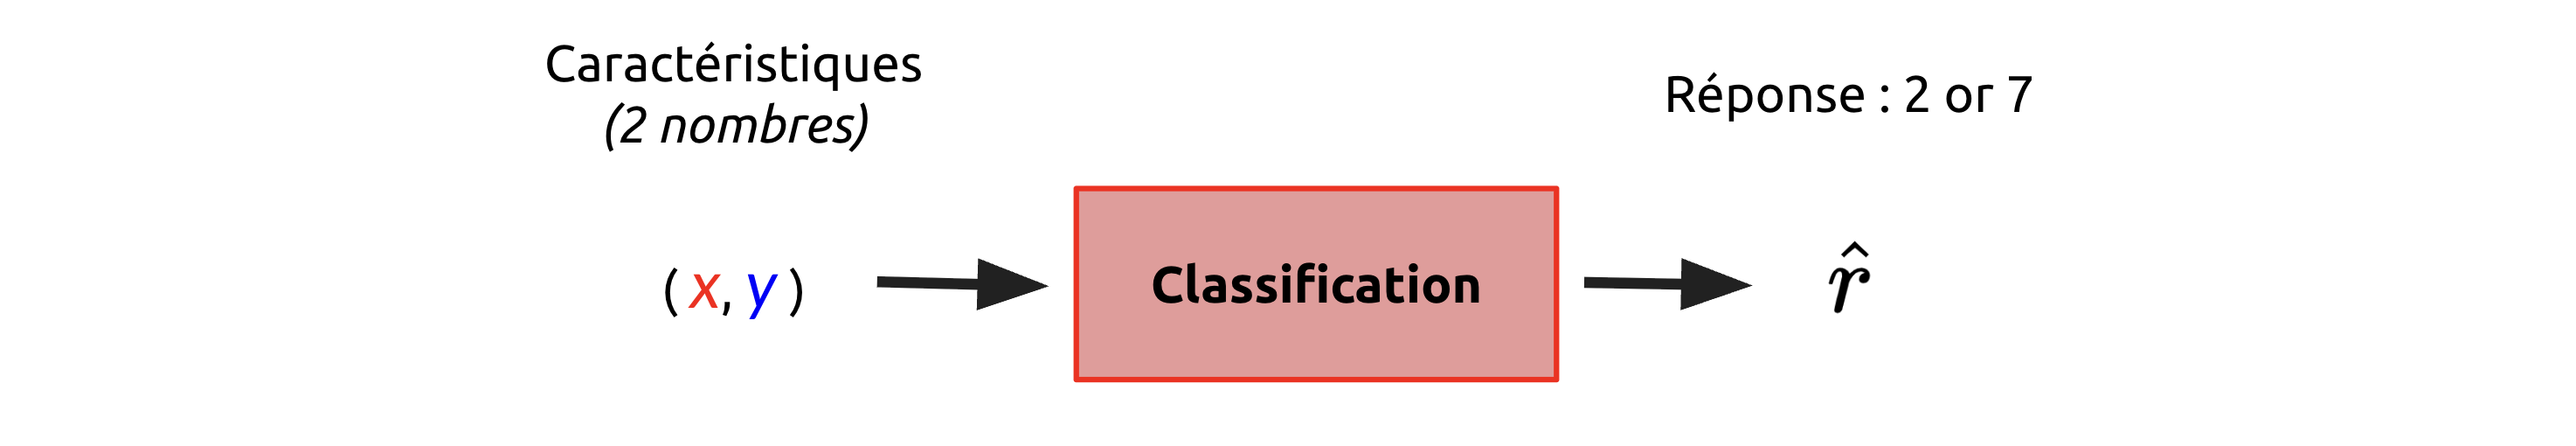  
!!!

!!! tip À quel nuage de points appartient un point donnée ?  
Certains points sont plus simples à classer que d'autres.  
  
**Exécutez la cellule suivante** pour visualiser les caractéristiques de l'ensemble des données et trois points qu'on a sélectionné.  
!!!


In [ ]:
tracer_6000_points()
validation_execution_tracer_6000_points()

!!! question 11) À quelle classe appartient chacun des trois points ?
**Remplacez les `...`** dans la cellule suivante par votre réponse ( 2 ou 7 ) **puis exécutez**.  
!!!


In [ ]:
classe_point_A = ...
classe_point_B = ...
classe_point_C = ...

validation_question_classes()

!!! tip Classification par rapport aux points de référence  
On vient de remarquer que ce n'est pas toujours facile de savoir à quelle classe appartient un point. Contrairement à nous, l'ordinateur ne peut pas deviner visuellement, il utilise un algorithme :   
- on calcule pour chaque classe son **point moyen**, c'est-à-dire la moyenne des coordonnées des points appartenant à cette classe ;  
- la classe d'un point est celle du point moyen dont il est le plus proche en **distance**.  
Avant passer à la classification de nos données, commençons par mieux comprendre les points moyens et les distances.  
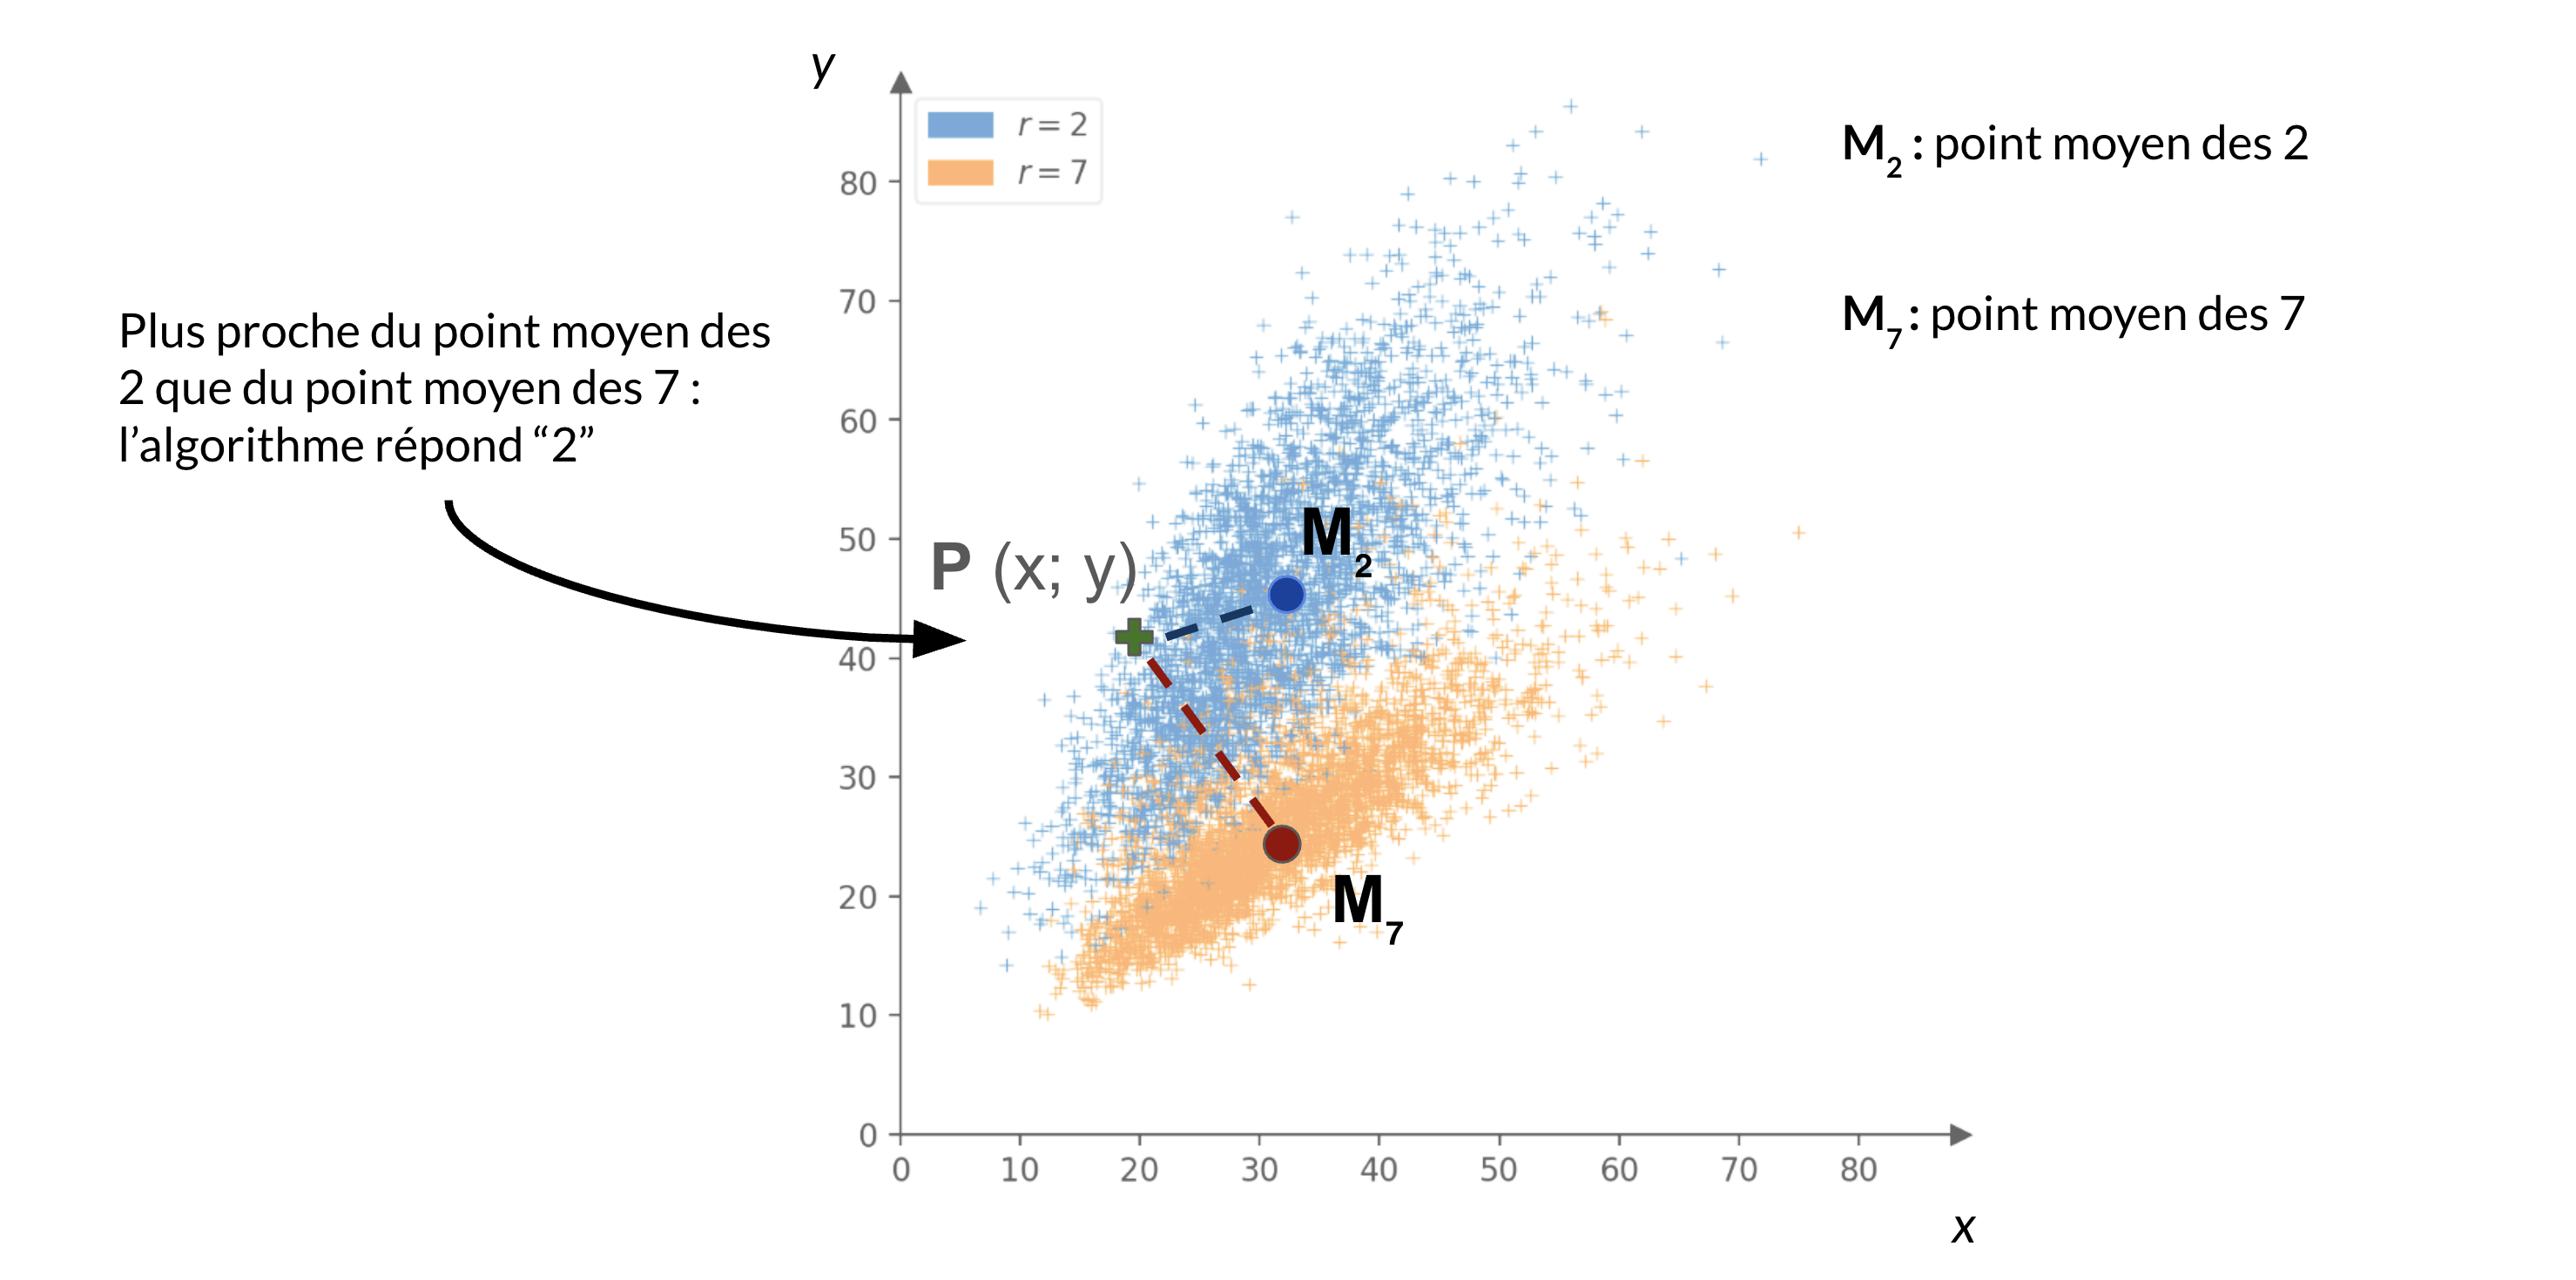  
!!!


### Mieux comprendre les point moyens et les distances


!!! tip Déplacement du point moyen  
Pour mieux comprendre les points moyens, on explore leur comportement lorsqu'un point se déplace. On regarde d'abord les cas du point moyen pour <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">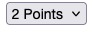</span>, <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">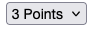</span> et <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">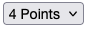</span>.  
Sur la figure suivante, vous pouvez déplacer les points pour voir comment se déplace le point moyen. Vous pouvez à tout moment  utiliser le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">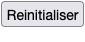</span> pour revenir à la configuration initiale.  
!!!


In [ ]:
afficher_manip_points_moyens()
validation_execution_afficher_manip_points_moyens()

!!! question 12) Quel est le déplacement horizontal du point moyen ?
Dans chacune des configurations à <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">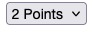</span>, <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">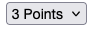</span> et <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">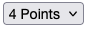</span>, de combien d'unités le point moyen se déplace-t-il dans la même direction si :  
1. Le point $B$ se déplace de 3 unités vers la droite ?  
  
**Remplacez les `...`** dans la cellule suivante par votre réponse au centième près **puis exécutez**.  
!!!


In [ ]:
# POUR 2 POINTS
deplacement_horizontal_2 = ...

# POUR 3 POINTS
deplacement_horizontal_3 = ...

# POUR 4 POINTS
deplacement_horizontal_4 = ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_deplacement_horizontal()

!!! question 13) Quel est le déplacement vertical du point moyen ?
Pour chaque nombre de points, de combien d'unités le point moyen se déplace-t-il dans la même direction si :  
2. Le point $B$ se déplace de 6 unités vers le haut ?  
  
**Remplacez les `...`** dans la cellule suivante par votre réponse au centième près **puis exécutez**.  
!!!


In [ ]:
# POUR 2 POINTS
deplacement_vertical_2 = ...

# POUR 3 POINTS
deplacement_vertical_3 = ...

# POUR 4 POINTS
deplacement_vertical_4 = ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_deplacement_vertical()

!!! example Pour aller plus loin<details>  
<summary>Envie de plus de détails ? Clique ici.</summary>Le point moyen $M$ de trois points $A$, $B$, $C$ a pour coordonnées :  
$$x_M = \frac{x_A + x_B + x_C}{3}, \: \frac{y_A + y_B + y_C}{3}.$$  
Si n'importe lequel des trois points se déplace de 3 unités vers la droite, que la coordonnée $x_M$ du point $M$ augmente de $\frac{3}{3}=1$. Autrement dit, $M$ se déplace d'une unité vers la droite.  
Quel effet sur le point moyen aurait le déplacement de 3 unités vers la droite d'un seul point parmis $n$ points ?</details>  
!!!


!!! info Distances par rapport aux points moyens  
Nous allons explorer maintenant la notion de distance d'un point $P$ par rapport à deux points moyens $A$ et $B$ correspondant aux classes 2 et 7.  
  
**Exécutez la cellule suivante** pour afficher le point $P$ associé à une image, ainsi que les deux points moyens utilisés pour la classification.  
!!!


In [ ]:
afficher_manip_distance(True)

validation_execution_afficher_manip_distance()

!!! question 14) Quelles sont les distances aux points moyens ?
1) Déterminez les valeurs des distances $AP$ et $BP$ au centième près.  
 2) À l'aide de ces distances proposez une classe pour le point $P$ (2 ou 7).  
  
**Remplacez les `...`** dans la cellule suivante par vos résultats **puis exécutez**.  
!!!


In [ ]:
# Distances entre P et les points moyens :
AP = ... 
BP = ... 

# Classe de P : 2 ou 7 ?
classe_P =  ...


# NE PAS TOUCHER APRES CETTE LIGNE
validation_distance_point_moyen()

!!! info Chercher des points à égale distance des deux point moyens  
Le point $P$ est maintenant mobile.  
Déplacez-le pour repérer les positions où $AP = BP$, c'est-à-dire où la distance à chaque point moyen est la même.  
  
**Exécutez la cellule suivante** pour trouver des points équidistants de $A$ et $B$.  
!!!


In [ ]:
afficher_manip_distance()

validation_execution_afficher_manip_distance_2()

!!! question 15) À quelle position est-on à égale distance des deux points moyens ?
Identifiez trois positions distinctes de P de coordonnées entières telles que $AP = BP$.  
  
**Remplacez les `...`** dans la cellule suivante par les coordonnées $(x,y)$ de ces trois positions.  
!!!


In [ ]:
# Coordoonées de trois points à équi-distance de A et B
# Les trois points doivent être différents

point_1 = ( ... , ... )
point_2 = ( ... , ... )
point_3 = ( ... , ... )

validation_recherche_mediatrice()

!!! example Pour aller plus loin<details>  
<summary>Envie de plus de détails ? Clique ici.</summary>  
Quel objet géométrique obtient-on en rassemblant tous les points $P$ situés à la même distance des deux points moyens ?  
Cette question est intéressante, car elle nous révèle comment découper le plan en deux zones pour la classification.</details>  
!!!


### Classification par points moyens


!!! abstract Classification de 10 points  
Maintenant, on peut mieux comprendre notre algorithme :  
- *Calculer* le **point moyen** de chaque classe : moyenne des coordonnées de ses points.  
- Pour un nouveau point, *mesurer* la **distance** à chacun de ces points moyens.  
- *Attribuer* à ce point la classe correspondant au point moyen *le plus proche*.  
  
**Exécutez la cellule suivante** pour visualiser la classification avec 10 images.  
!!!


In [ ]:
tracer_10_points_centroides()
validation_execution_10_points()

!!! question 16) Quel est le pourcentage d'erreur sur ce schéma ?
Calculez le pourcentage d'erreur pour ces 10 images en utilisant les points moyens.  
 Remarque :   
a. Lors du survol, la distance par rapport à chaque point de référence est affichée.  
b. Les points les plus proches du point de référence de la classe 2 sont classés comme 2, tandis que ceux plus proches du point de référence de la classe 7 sont classés comme 7.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite()

!!! info Découpage du plan par rapport aux points de référence  
**Exécutez la cellule suivante** pour visualiser la droite médiatrice obtenue à partir de points moyens pour 10 images.  
  
Ce schéma aurait-il facilité la classification précédente ?  
Déplacez les points pour explorer les variations des points moyens et leur impact sur la médiatrice.  
!!!


In [ ]:
tracer_10_points_droite()
validation_execution_10_points_droite()

!!! tip Visualisation de la classification par des points de référence  
Vous allez maintenant visualiser les points moyens et la droite médiatrice pour résoudre le challenge.  
Est-ce que l'erreur est satisfaisante ?  
  
**Exécutez la cellule suivante** pour afficher les points pour toutes les images de la base de données.  
!!!


In [ ]:
tracer_points_centroides(droite = True)

validation_execution_tracer_points_droite()

### Essayons de trouver 2 meilleures caractéristiques !


!!! tip Nouvelles zones de l'image  
**Exécutez la cellule suivante** pour voir les nouvelles zones de l'image que nous avons choisies.  
!!!


In [ ]:
A_1 = (7, 7)       # <- coordonnées du point A1
B_1 = (20, 20)     # <- coordonnées du point B1


A_2 = (14, 14)     # <- coordonnées du point A2
B_2 = (23, 23)     # <- coordonnées du point B2



# NE PAS TOUCHER CES LIGNES
affichage_zones_custom(A_1, B_1, A_2, B_2)

validation_execution_def_caracteristiques_ripou()

!!! question 17) Que pensez-vous des nuages de points associés à ces deux zones ?
Les nuages de points sont-ils bien séparés ?  
Pourquoi d'après-vous ?  
Observez les deux zones en remontant à la cellule précédente pour vous aider à répondre.  
**Exécutez la cellule suivante pour continuer.**  
!!!


In [ ]:
validation_execution_scatter_caracteristiques_ripou()

!!! question 18) Changer les zones choisies pour définir vos propres caractéristiques
**Exécutez la cellule suivante** puis sélectionnez deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Cliquez sur le bouton zone1 ou zone2 pour choisir la zone à sélectionner, puis cliquez sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!


!!! warning SOS <details> <summary>Rien ne se passe ? Clique ici  </summary>  
 Avec la souris sélectionne une zone dans une des images :   
-clique sur zone 2    
-sélectionne une zone   
-clique sur zone 1  
-selectionne une zone  
  
 L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.  </details>  
!!!


In [ ]:
afficher_customisation()
validation_execution_caracteristiques_custom()

!!! question 19) Trouvez des meilleurs zones pour les caractéristiques
Modifiez les zones qui définissent les caractéristiques afin de définir des points de référence optimaux. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite médiatrice.   
Ajustez les zones de calcul pour les caractéristiques pour obtenir deux points de référence qui minimisent cette erreur.  
  
**Exécutez la cellule suivante** pour finir le notebook dès que le pourcentage d'erreur sera inférieur à 10%.  
!!!


!!! warning SOS <details> <summary>Rien ne se passe ? Clique ici  </summary>  
 Avec la souris sélectionne une zone dans une des images :   
-clique sur zone 2    
-sélectionne une zone   
-clique sur zone 1  
-selectionne une zone  
  
 L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.  </details>  
!!!


In [ ]:
calculer_score_custom_droite()

!!! abstract Fin du Notebook  
Dans ce TP, vous avez :   
  
- Utilisé deux caractéristiques pour chaque image ;  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées ;  
- Classifié en fonction de la distance par rapport aux points de référence ;  
- Ajusté les zones pour calculer les caractéristiques et ainsi optimiser la classification et minimiser votre erreur.  
  
Continuez à chercher des bonnes zones pour diminuer votre pourcentage d'erreur. Vous pouvez faire jusqu'à moins de 5.5% d'erreur !  
!!!
